## 1.数据划分与验证方法

### k折交叉验证

5-折交叉验证每折准确率： [1.         0.96666667 0.93333333 0.93333333 0.93333333]
平均准确率：0.9533, 标准差：0.0267


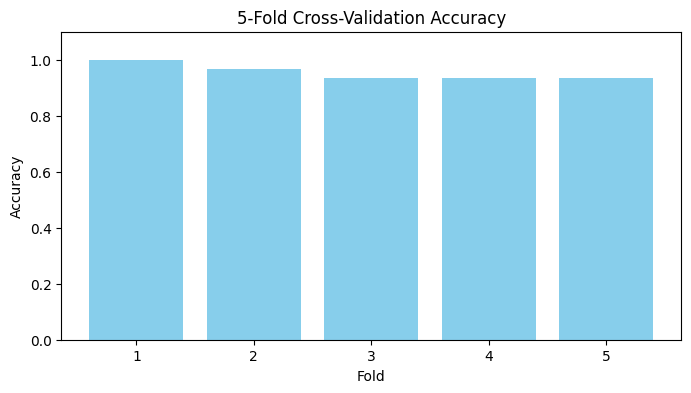

In [1]:
# 导入必要库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# 1. 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 2. 定义模型
model = DecisionTreeClassifier(random_state=42)

# 3. 定义 k 折交叉验证
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 4. 执行交叉验证
scores = cross_val_score(model, X, y, cv=kf)

# 5. 输出每折的准确率
print(f"{k}-折交叉验证每折准确率：", scores)
print(f"平均准确率：{scores.mean():.4f}, 标准差：{scores.std():.4f}")

# 6. 可视化结果
plt.figure(figsize=(8,4))
plt.bar(range(1, k+1), scores, color='skyblue')
plt.ylim(0, 1.1)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title(f"{k}-Fold Cross-Validation Accuracy")
plt.xticks(range(1, k+1))
plt.show()


## 2.评估指标

### 分类任务ROC曲线与AUC

AUC = 0.8197


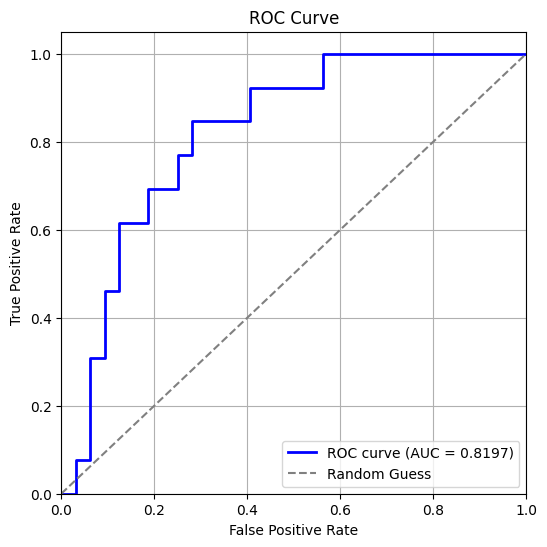

In [2]:
# 导入必要库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 1. 加载数据
iris = load_iris()
X = iris.data
y = (iris.target == 1).astype(int)  # 将 Iris-versicolor 作为正类

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 训练逻辑回归模型
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# 4. 获取预测概率（正类概率）
y_prob = model.predict_proba(X_test)[:, 1]

# 5. 计算 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 6. 计算 AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC = {auc_score:.4f}")

# 7. 可视化 ROC 曲线
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### 回归任务指标

MSE: 21.5174
RMSE: 4.6387
MAE: 3.1627
R²: 0.7112
MAPE: 16.52%


/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

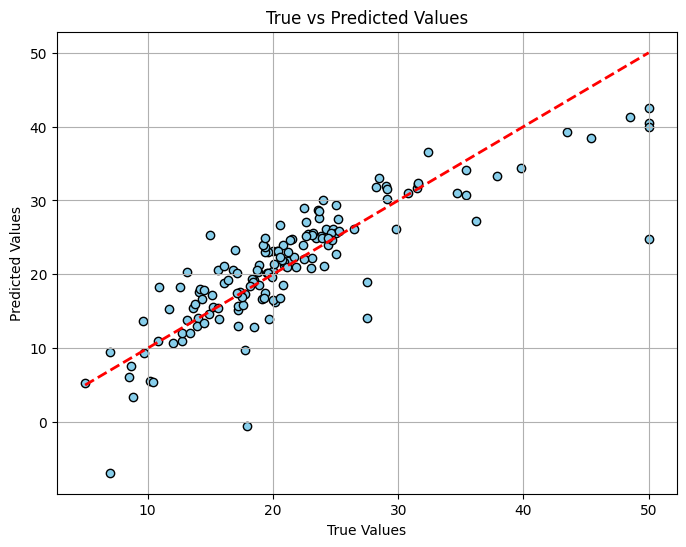

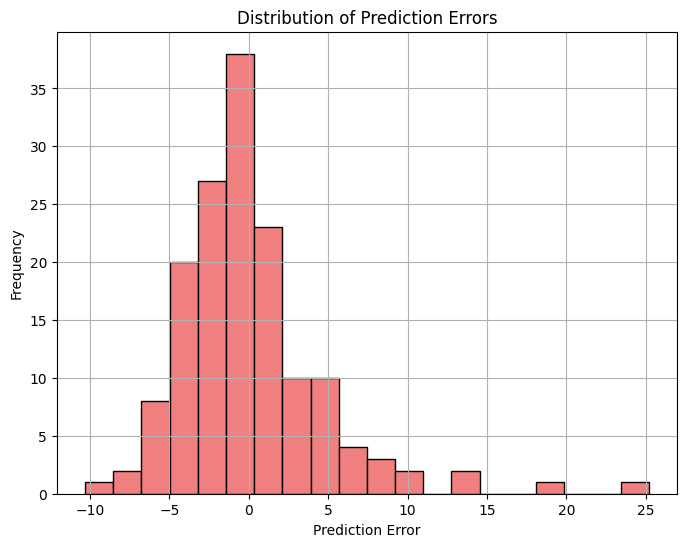

In [3]:
# 导入必要库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston  # 新版本可用 fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. 加载数据
try:
    boston = load_boston()
    X, y = boston.data, boston.target
except:
    from sklearn.datasets import fetch_california_housing
    cali = fetch_california_housing()
    X, y = cali.data, cali.target

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 4. 计算回归评估指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

# 5. 可视化预测误差
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='skyblue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.grid(True)
plt.show()

# 6. 可视化误差分布
errors = y_test - y_pred
plt.figure(figsize=(8,6))
plt.hist(errors, bins=20, color='lightcoral', edgecolor='k')
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.grid(True)
plt.show()


### 聚类任务指标

Silhouette Score: 0.4599
Calinski-Harabasz Index: 241.9044
Davies-Bouldin Index: 0.8336
NMI (Normalized Mutual Information): 0.6595
ARI (Adjusted Rand Index): 0.6201


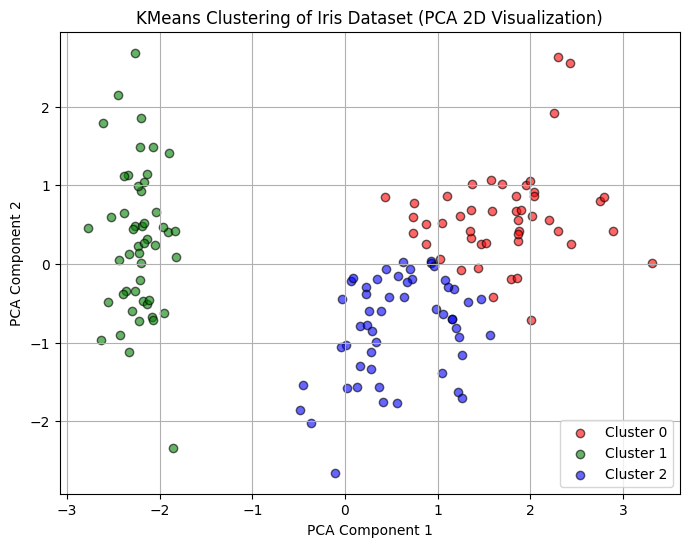

In [4]:
# 导入必要库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.decomposition import PCA

# 1. 加载 Iris 数据集
iris = load_iris()
X = iris.data
y_true = iris.target  # 真实类别

# 2. 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 使用 KMeans 聚类
k = 3  # 聚类簇数
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# 4. 计算聚类评估指标
sil_score = silhouette_score(X_scaled, y_pred)
ch_score = calinski_harabasz_score(X_scaled, y_pred)
db_score = davies_bouldin_score(X_scaled, y_pred)
nmi_score = normalized_mutual_info_score(y_true, y_pred)
ari_score = adjusted_rand_score(y_true, y_pred)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Calinski-Harabasz Index: {ch_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")
print(f"NMI (Normalized Mutual Information): {nmi_score:.4f}")
print(f"ARI (Adjusted Rand Index): {ari_score:.4f}")

# 5. 可视化聚类结果（使用 PCA 降到 2D）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(X_pca[y_pred==i, 0], X_pca[y_pred==i, 1], 
                color=colors[i], label=f'Cluster {i}', alpha=0.6, edgecolor='k')

# 标记真实类别中心
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering of Iris Dataset (PCA 2D Visualization)")
plt.legend()
plt.grid(True)
plt.show()

## 3.模型调优

### 超参数搜索

Grid Search Best Parameters: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 150}
Grid Search Best Score: 0.9428571428571428


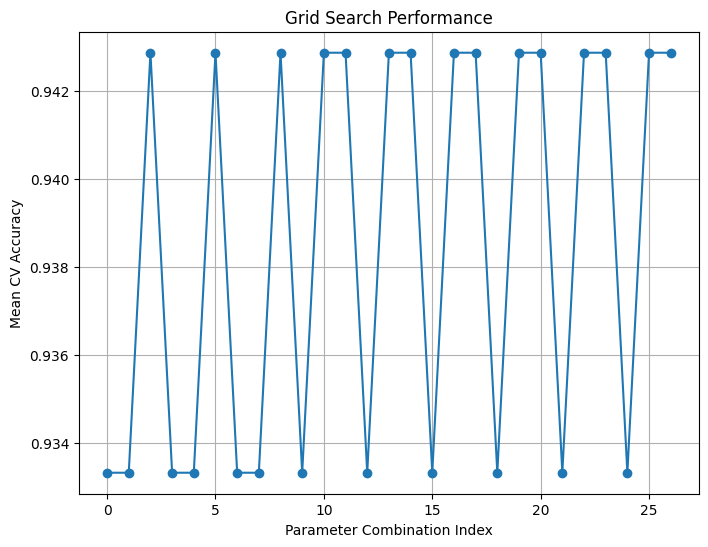

Random Search Best Parameters: {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 142}
Random Search Best Score: 0.9428571428571428


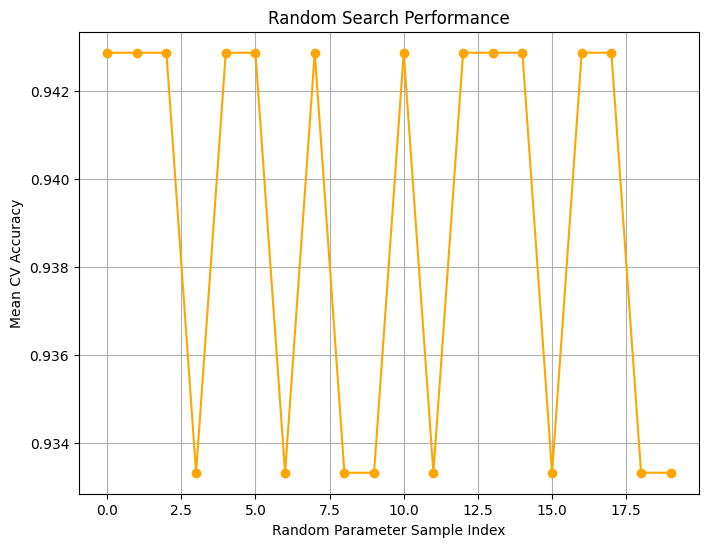

In [5]:
# 导入必要库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

# 1. 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 定义随机森林模型
rf = RandomForestClassifier(random_state=42)

# ---------------------------
# 网格搜索 Grid Search
# ---------------------------
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

print("Grid Search Best Parameters:", grid_search.best_params_)
print("Grid Search Best Score:", grid_search.best_score_)

# 可视化网格搜索结果
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
plt.figure(figsize=(8,6))
plt.plot(range(len(mean_test_scores)), mean_test_scores, marker='o', linestyle='-')
plt.xlabel("Parameter Combination Index")
plt.ylabel("Mean CV Accuracy")
plt.title("Grid Search Performance")
plt.grid(True)
plt.show()

# ---------------------------
# 随机搜索 Random Search
# ---------------------------
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 10)
}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42, return_train_score=True)
random_search.fit(X_train, y_train)

print("Random Search Best Parameters:", random_search.best_params_)
print("Random Search Best Score:", random_search.best_score_)

# 可视化随机搜索结果
results = random_search.cv_results_
mean_test_scores = results['mean_test_score']
plt.figure(figsize=(8,6))
plt.plot(range(len(mean_test_scores)), mean_test_scores, marker='o', linestyle='-', color='orange')
plt.xlabel("Random Parameter Sample Index")
plt.ylabel("Mean CV Accuracy")
plt.title("Random Search Performance")
plt.grid(True)
plt.show()


### early stopping

Epoch 1/100, Train Loss: 1.1341, Val Loss: 1.1089
Epoch 2/100, Train Loss: 1.0892, Val Loss: 1.0644
Epoch 3/100, Train Loss: 1.0474, Val Loss: 1.0203
Epoch 4/100, Train Loss: 1.0074, Val Loss: 0.9767
Epoch 5/100, Train Loss: 0.9674, Val Loss: 0.9321
Epoch 6/100, Train Loss: 0.9269, Val Loss: 0.8857
Epoch 7/100, Train Loss: 0.8850, Val Loss: 0.8391
Epoch 8/100, Train Loss: 0.8429, Val Loss: 0.7928
Epoch 9/100, Train Loss: 0.8016, Val Loss: 0.7480
Epoch 10/100, Train Loss: 0.7623, Val Loss: 0.7065
Epoch 11/100, Train Loss: 0.7257, Val Loss: 0.6688
Epoch 12/100, Train Loss: 0.6921, Val Loss: 0.6345
Epoch 13/100, Train Loss: 0.6610, Val Loss: 0.6031
Epoch 14/100, Train Loss: 0.6318, Val Loss: 0.5742
Epoch 15/100, Train Loss: 0.6036, Val Loss: 0.5480
Epoch 16/100, Train Loss: 0.5762, Val Loss: 0.5238
Epoch 17/100, Train Loss: 0.5496, Val Loss: 0.5013
Epoch 18/100, Train Loss: 0.5243, Val Loss: 0.4809
Epoch 19/100, Train Loss: 0.5006, Val Loss: 0.4630
Epoch 20/100, Train Loss: 0.4791, Val Lo

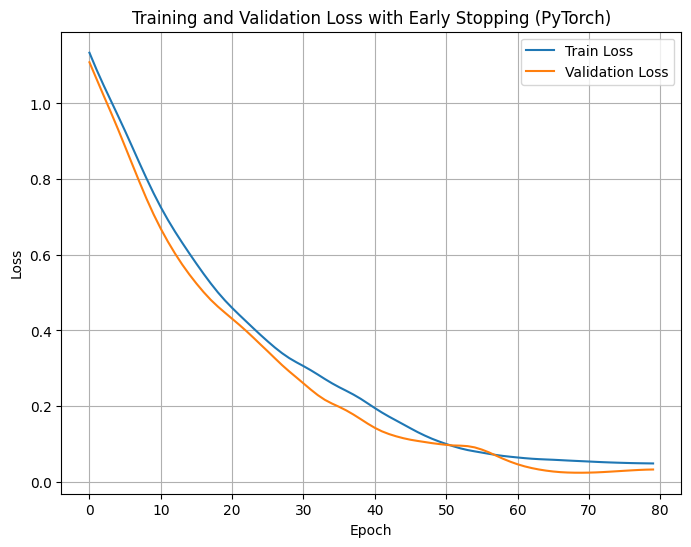

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1. 数据准备
# ---------------------------
iris = load_iris()
X = iris.data
y = iris.target

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 转为torch tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

# ---------------------------
# 2. 构建简单神经网络
# ---------------------------
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN(input_dim=4, hidden_dim=16, output_dim=3)

# ---------------------------
# 3. 设置损失函数和优化器
# ---------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ---------------------------
# 4. Early Stopping 参数
# ---------------------------
patience = 10
best_val_loss = np.inf
counter = 0
best_model_state = None

# ---------------------------
# 5. 训练模型
# ---------------------------
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # 训练模式
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # 验证模式
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

    # Early Stopping 判断
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

# 恢复最佳模型参数
model.load_state_dict(best_model_state)

# ---------------------------
# 6. 可视化训练过程
# ---------------------------
plt.figure(figsize=(8,6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss with Early Stopping (PyTorch)')
plt.legend()
plt.grid(True)
plt.show()
